In [1]:
import maboss

In [2]:
model = maboss.load("Apoptosis.bnd", "Apoptosis.cfg")

### Simplifying the model and drawing the interaction graph

In [3]:
mini_model = maboss.to_minibn(model)

In [4]:
mini_model.simplify()

AKT1 <- !M
APAF1 <- BAX
Apoptosis_phenotype <- CASP3|CASP7|N|Orf3b|Orf6|Orf8a|Orf9b|S
Apoptosome_complex <- !AKT1&APAF1&CASP9_Cytoplasm_input&CYCS
BAD <- !AKT1
BAD_BBC3_BCL2L11_complex <- BCL2_MCL1_BCL2L1_complex
BAX <- (BAD_BBC3_BCL2L11_complex&!BCL2_MCL1_BCL2L1_complex)|(!BCL2_MCL1_BCL2L1_complex&BID)
BCL2_MCL1_BCL2L1_complex <- (!BAD&E)|(!BAD&Orf7a)
BID <- CASP8
CASP3 <- CASP8|CASP9_Cytoplasm
CASP7 <- CASP8|CASP9_Cytoplasm
CASP8 <- FADD|TRADD_FADD_complex
CASP9_Cytoplasm <- !AKT1&Apoptosome_complex
CASP9_Cytoplasm_input <- CASP9_Cytoplasm_input
CYCS <- MAPK14
E <- E
FADD <- FAS_FASL_complex
FAS_FASL_complex <- FAS_FASL_complex
M <- M
MAPK14 <- Orf3a
N <- N
Orf3a <- Orf3a
Orf3b <- Orf3b
Orf6 <- Orf6
Orf7a <- Orf7a
Orf8a <- Orf8a
Orf9b <- Orf9b
S <- S
TNF_TNFRSF1A_complex <- TNF_TNFRSF1A_complex
TRADD <- TRADD
TRADD_FADD_complex <- FADD&TNF_TNFRSF1A_complex&TRADD

# computing graph layout...


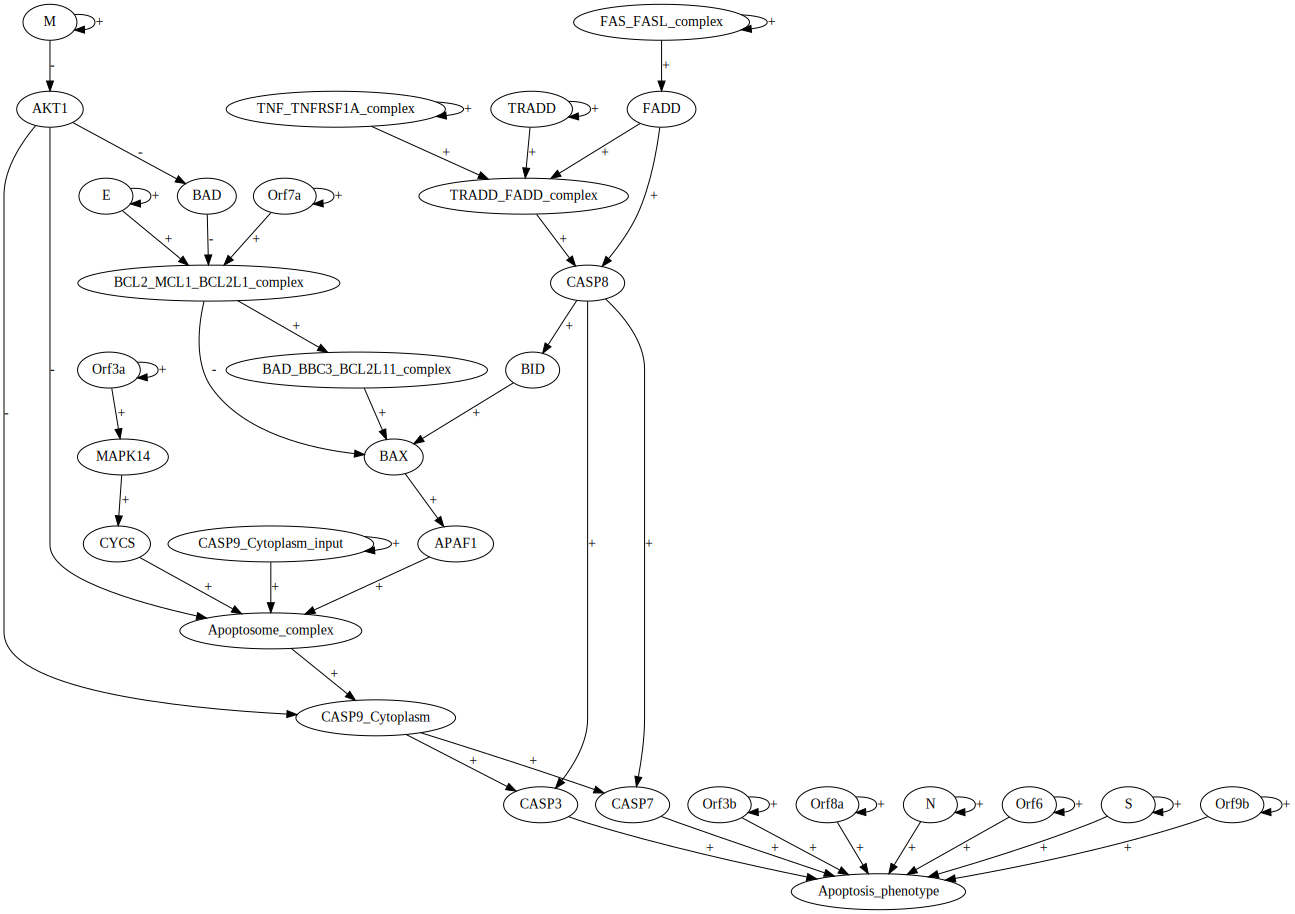

In [5]:
mini_model.influence_graph()

### Wild type simulation

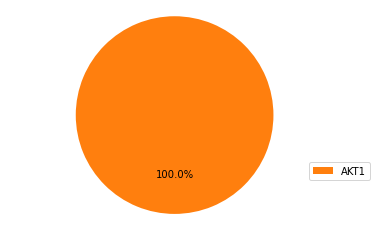

In [6]:
res1 = model.run()
res1.plot_piechart()

### TNF simulation

In [7]:
model_tnf = model.copy()
model_tnf.network.set_istate(
    'TNF_TNFRSF1A_complex', [0, 1]
)

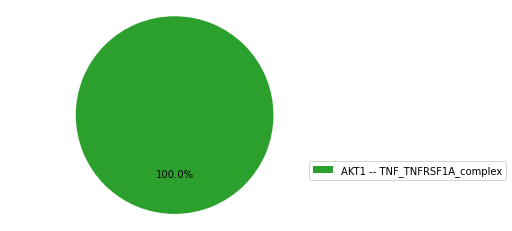

In [8]:
res_tnf = model_tnf.run()
res_tnf.plot_piechart()

### FASL simulation

In [9]:
model_fasl = model.copy()
model_fasl.network.set_istate('FAS_FASL_complex', [0, 1])

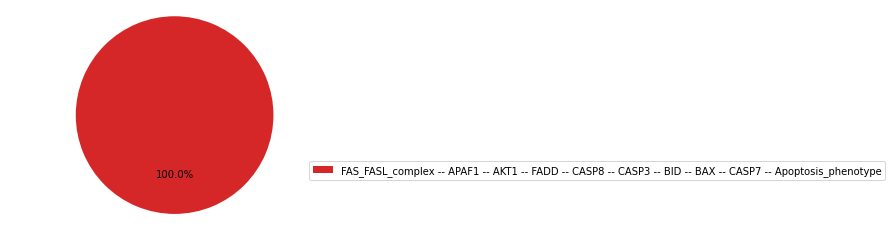

In [10]:
res_fasl = model_fasl.run()
res_fasl.plot_piechart()

### TNF + FASL simulation

In [11]:
model_tnf_fasl = model.copy()
model_tnf_fasl.network.set_istate('TNF_TNFRSF1A_complex', [0, 1])
model_tnf_fasl.network.set_istate('FAS_FASL_complex', [0, 1])

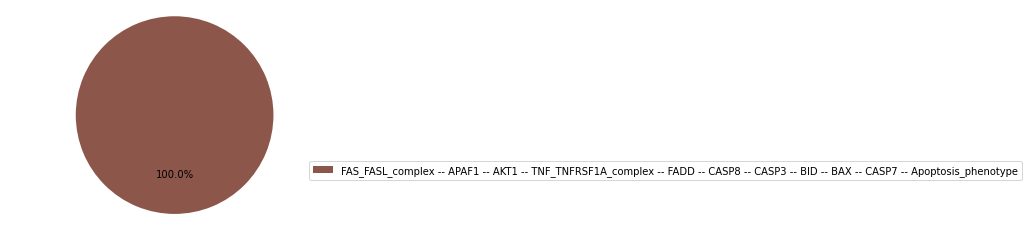

In [12]:
res_tnf_fasl = model_tnf_fasl.run()
res_tnf_fasl.plot_piechart()